# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



**Notebook Key**

Author: Gene Carlo F. Belinario

In [1]:
## import packages here
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [2]:
## define the N by N matrix as a numpy array
A = np.array([[8, -2, -20],
              [-2, -3, -9],
              [-20, -9, -3]])

## use the linalg function to find the eigenvalues and the eigenvectors of matrix A
eigval, V = np.linalg.eigh(A)

## eigval is a 1D array that contains the calculated eigenvalues 
## V is the 3x3 matrix where each column V[:,i] corresponds to the eigenvectors for the i-th eigenvalue in eigval 

print("Eigenvalues:", eigval)
print("Eigenvector columns: \n", V)

Eigenvalues: [-21.99606195   0.16021522  23.83584674]
Eigenvector columns: 
 [[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]


In [3]:
## define eigenvalue matrix D
D = np.diag(eigval)

## use multiply matrix at the RHS
RHS = np.matmul(A,V)
LHS = np.matmul(V,D)

## check matrices on the RHS and LHS of the equation
print(RHS)
print(LHS)

[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]


Note that the elements in the matrices above only display digits up to a certain precision. When accessed, the corresponding elements may not entirely be equivalent. We therefore resort to calculating the difference between the corresponding elements and check if the difference is below a certain tolerance value close to zero. 

In [5]:
## matrix dimension
rows, columns = 3, 3
## tolerance
epsilon = 10**(-12)

## define a for loop that compares elements of AV and VD
for row in range(rows):
    for column in range(columns):
        diff = RHS[row][column] - LHS[row][column]
        if diff > epsilon:
            print(f"AV_{row}{column} = VD_{row}{column}: False")
        else:
            print(f"AV_{row}{column} = VD_{row}{column}: True")

AV_00 = VD_00: True
AV_01 = VD_01: True
AV_02 = VD_02: True
AV_10 = VD_10: True
AV_11 = VD_11: True
AV_12 = VD_12: True
AV_20 = VD_20: True
AV_21 = VD_21: True
AV_22 = VD_22: True


We checked for the equivalence of the corresponding elements $\text{AV}_{nm}$ and $\text{VD}_{nm}$, where we have shown that the elements of each matrix are equal if their differences are less that $\epsilon = 10^{-15}$. 

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [6]:
def relax(c, x0, accuracy, show_iter_sol=False):

    i = 1
    
    def f(x):
        return 1 - np.exp(-c*x)
    
    def error(x1, x2):
        return (x1 - x2) / (1 - 1/(c*np.exp(-c*x1)))
    
    x1 = x0
    x2 = f(x1)

    while abs(error(x1, x2)) > accuracy:
        x1, x2 = x2, f(x2)
        i += 1
    
    if show_iter_sol == True:
        print(f"Iterations:{i}")
        print(f"Solution:{x2}")

    return x2

In [7]:
## solve the equation for c=2
epsilon = 10**(-6)
c = 2
x0 = 0.5

x = relax(c=c, x0=x0, accuracy=epsilon, show_iter_sol=True)

Iterations:15
Solution:0.7968113781935964


In [10]:
## generate solution for c=0 to c=3
c_start = 0
c_end = 10
step = 0.01

x0 = 1
epsilon = 10**(-6)

c = np.arange(c_start, c_end + step, step)
x = [relax(c=cc, x0=x0, accuracy=epsilon) for cc in c]


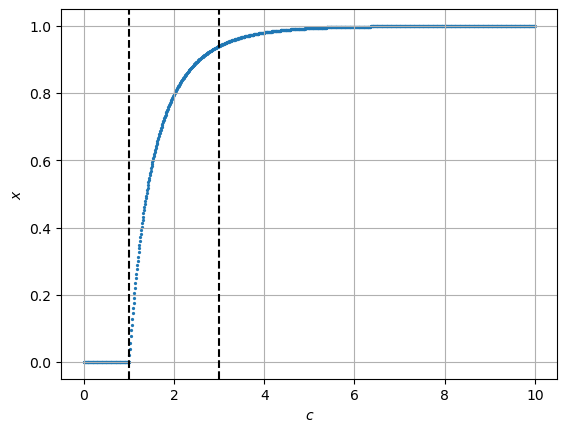

In [23]:
plt.scatter(c, x, s=7, marker=".")
plt.xlabel(r"$c$")
plt.ylabel(r"$x$")
plt.axvline(3, color="black", linestyle="--")
plt.axvline(1, color="black", linestyle="--")
plt.grid()
plt.show()

The graph shows that for $0 \leq c \leq 1$, the solution of the equation is $x=0$. Meanwhile, the equation has a non-zero solution for $1 < c \leq 3$. Additionally, it is also interesting to investigate the solutions in the regime $c >3$. Doing so, we will also find that in this case, the solution $x \to 1$.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance $r$ from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [24]:
## define constants in the problem and express in SI units
G = 6.674 * 10 ** (-11)       # gravitational constant in N m^2 / kg^2
M = 5.974 * 10 ** 24          # mass of Earth in kg
m = 7.348 * 10 ** 22          # mass of moon in kg
R = 3.844 * 10 ** 8           # distance from Earth to Moon in m
w = 2.662 * 10 ** (-6)        # angular velocity of the Moon and the satellite around the Earth in rad/s

def f(r):
    return G*M*(R-r)**2 - (r**2)*G*m - (w**2)*(r**3)*(R-r)**2

def fprime(r):
    return -2*G*(M*(R-r)+m*r) - (w**2)*(r**2)*(R-r)*(3*R-5*r)

We transformed Equation (1) into the form $f(r)$ and find $f'(r)$ as follows: 

\begin{equation}
f(r) = GM(R-r)^2 - Gmr^2 -\omega ^2 r^3 (R-r)^2 \tag{2}
\end{equation}

\begin{equation}
f'(r) = -2GM(R-r) - 2Gmr - \omega^2 \left[ 3r^2(R-r)^2 - 2r^3(R-r) \right] \tag{3}
\end{equation}

\begin{equation}
f'(r) = -2G\left[ M(R-r) + mr \right] - \omega^2 r^2 (R-r) (3R - 5r) \tag{4}
\end{equation}

In [25]:
## use Newton's method to find the root
def root(f, g, start, accuracy):
    x =  start
    d = f(x) / g(x)

    while abs(d) > accuracy:
        d = f(x) / g(x)
        x -= d
    
    print(x)
    
    return x

A safe and physically reasonable initial guess for $r$ would be a number which is of the same order of magnitude as $R$. In this key, we arbitrarily choose $r=3 \times 10^{8}$ as the initial guess.

In [26]:
r0 =  3.0 * 10 ** 8
epsilon = 10 ** (-8)

r = root(f=f, g=fprime, start=r0, accuracy=epsilon)

326045071.66535544


The Lagrange point therefore is $L_1 = 3.260 \times 10^{5} \ \text{km}$ from the center of the Earth.